In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [16]:
# Load the dataset
file_path = 'benckmark-full.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,name,Happiness/Sadness,Hopeful/Uncertainty,Secure/Insecure,assignedLands,contractor,cropSize,currentActivity,currentDay,currentPeasantLeisureType,...,purpose,rainfallConditions,robberyAccount,seeds,timeLeftOnDay,toPay,tools,totalHarvestedWeight,waterAvailable,Emotions
0,PeasantFamily_7,99.009.997,95.009.995,95.009.995,"[{'farmName': 'farm_17_large', 'landName': 'la...",NaN,0,NONE,366,NONE,...,farmer,normal,0,794,24,0,10,1.016.510.541.322.220,1934,SI
1,PeasantFamily_40,99.029.994,9.502.999,9.502.999,"[{'farmName': 'farm_26_medium', 'landName': 'l...",NaN,0,NONE,366,NONE,...,farmer,normal,0,859,24,0,10,6.216.691.849.915.960,1939,SI
2,PeasantFamily_49,9.903,9.702,9.702,"[{'farmName': 'farm_11_large', 'landName': 'la...",NaN,1,NONE,366,NONE,...,farmer,normal,0,926,24,0,10,10.699.290.575.857.700,2046,SI
3,PeasantFamily_34,9.901.999,97.019.994,97.019.994,"[{'farmName': 'farm_35_medium', 'landName': 'l...",NaN,0,NONE,366,NONE,...,farmer,normal,0,795,24,0,10,832.098.397.568.391,1915,SI
4,PeasantFamily_47,99.039.996,93.029.994,93.029.994,"[{'farmName': 'farm_27_medium', 'landName': 'l...",NaN,0,NONE,366,NONE,...,farmer,normal,0,784,24,0,10,7.423.647.875.027.530,1904,SI


In [17]:
# Check if 'initialMoney' column exists in the dataframe
if 'initialMoney' in df.columns:
    # Calculate the average of initialMoney
    initial_money_avg = df['initialMoney'].mean()

    # Splitting the dataset into three groups based on initialMoney
    high_group = df[df['initialMoney'] > initial_money_avg]
    medium_group = df[df['initialMoney'] == initial_money_avg]
    low_group = df[df['initialMoney'] < initial_money_avg]

    initial_money_avg, high_group.shape[0], medium_group.shape[0], low_group.shape[0]
else:
    initial_money_avg, high_group, medium_group, low_group = None, None, None, None

initial_money_avg, high_group, medium_group, low_group

(2201678.3906666664,
                  name Happiness/Sadness Hopeful/Uncertainty Secure/Insecure  \
 2    PeasantFamily_49             9.903               9.702           9.702   
 5    PeasantFamily_19        99.029.994          97.009.987      97.009.987   
 11   PeasantFamily_22        99.009.997           9.700.999       9.700.999   
 13   PeasantFamily_54        99.009.997           9.700.999       9.700.999   
 15   PeasantFamily_15             9.898               9.698           9.698   
 ..                ...               ...                 ...             ...   
 742  PeasantFamily_48             9.903               9.702           9.702   
 743  PeasantFamily_60             9.902          97.040.004      97.040.004   
 744   PeasantFamily_4             9.903          97.010.005      97.010.005   
 746  PeasantFamily_10             9.902               9.501           9.501   
 749  PeasantFamily_25             9.902               9.502           9.502   
 
                 

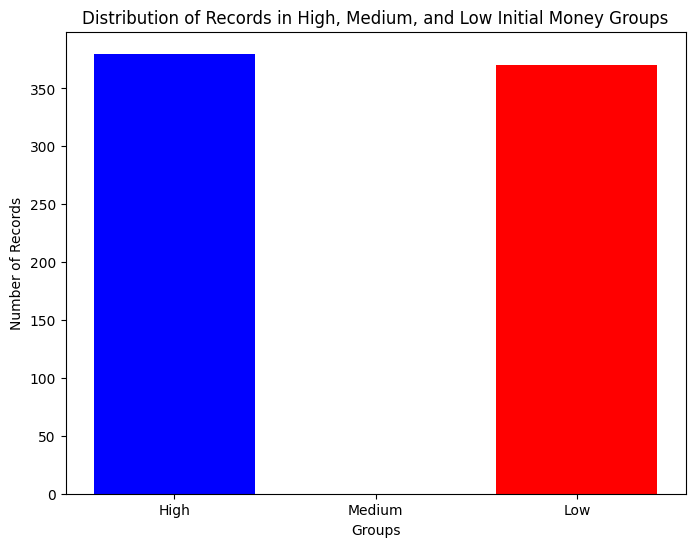

In [18]:
# Prepare data for plotting
groups = ['High', 'Medium', 'Low']
counts = [high_group.shape[0], medium_group.shape[0], low_group.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(groups, counts, color=['blue', 'green', 'red'])
plt.xlabel('Groups')
plt.ylabel('Number of Records')
plt.title('Distribution of Records in High, Medium, and Low Initial Money Groups')
plt.show()

In [20]:
# Re-attempting to extract the postfix (small, medium, large) from the peasantFamilyLandAlias column
# and applying this extraction to the entire dataframe, then to each group
df['landSize'] = df['peasantFamilyLandAlias'].apply(lambda x: x.split('_')[-1] if '_' in x else None)

# Adding the extracted landSize column to each group
high_group['landSize'] = df['landSize']
medium_group['landSize'] = df['landSize']
low_group['landSize'] = df['landSize']

# Dividing each group (high, medium, low) into three subgroups based on landSize
high_group_sub = high_group.groupby('landSize').size()
medium_group_sub = medium_group.groupby('landSize').size()
low_group_sub = low_group.groupby('landSize').size()

# Combining the subgroup sizes for plotting
subgroups = pd.concat([high_group_sub, medium_group_sub, low_group_sub], axis=1)
subgroups.columns = ['High', 'Medium', 'Low']
subgroups.fillna(0, inplace=True)  # Replace NaN with 0 for groups with no data

subgroups

/tmp/ipykernel_363991/2241908077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_group['landSize'] = df['landSize']
/tmp/ipykernel_363991/2241908077.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_group['landSize'] = df['landSize']


,High,Medium,Low
landSize,,,
large,91,170,79
medium,92,200,108
small,197,380,183


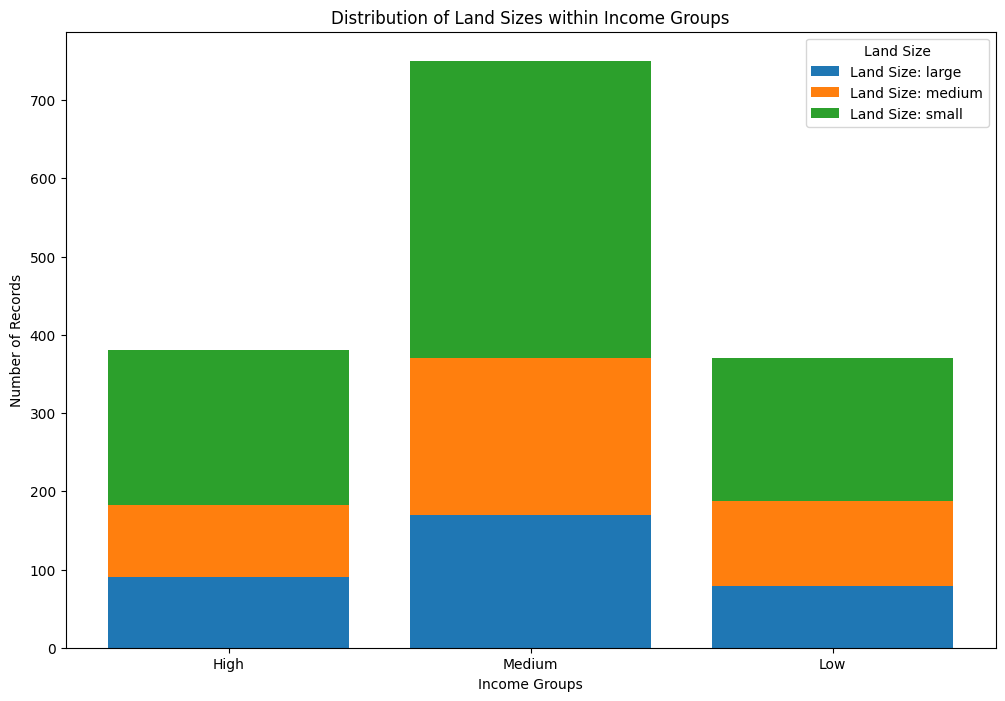

In [21]:
# Plotting the distribution of subgroups within each group
plt.figure(figsize=(12, 8))

# Plot for each land size category
for i, land_size in enumerate(subgroups.index):
    plt.bar(subgroups.columns, subgroups.loc[land_size], bottom=subgroups.loc[subgroups.index[:i]].sum(), label=f'Land Size: {land_size}')

plt.xlabel('Income Groups')
plt.ylabel('Number of Records')
plt.title('Distribution of Land Sizes within Income Groups')
plt.legend(title='Land Size')
plt.show()

In [22]:
# Analyzing the behavior of 'money' in each group, considering the 'Emotions' column

# Grouping and calculating the average 'money' for each subgroup (high, medium, low) and emotion status
average_money_by_group_emotion = df.groupby(['landSize', 'Emotions'])['money'].mean().unstack()

average_money_by_group_emotion

Emotions,No,SI
landSize,,
large,2.118951e+06,1.964600e+06
medium,2.249092e+06,2.264983e+06
small,1.679753e+06,1.658612e+06


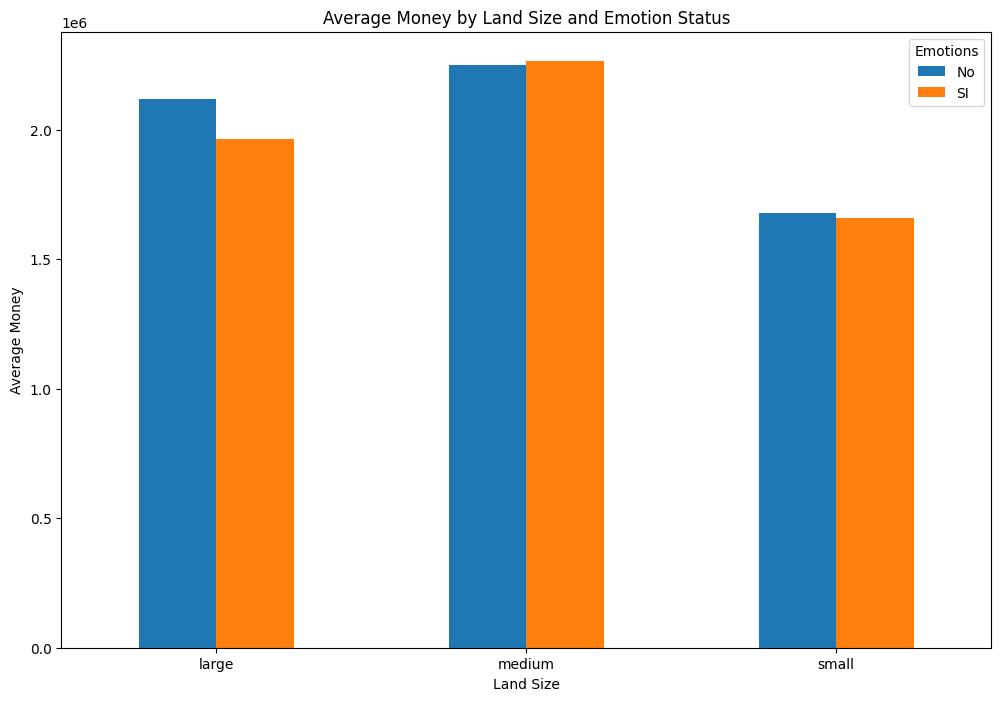

In [23]:
# Plotting the average money by land size and emotion status

average_money_by_group_emotion.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Land Size')
plt.ylabel('Average Money')
plt.title('Average Money by Land Size and Emotion Status')
plt.xticks(rotation=0)
plt.legend(title='Emotions')
plt.show()

In [24]:
# Re-attempting to clean the 'totalHarvestedWeight' data
# It seems the data contains periods as thousand separators. We'll remove them before converting to float.
df['totalHarvestedWeight_clean'] = df['totalHarvestedWeight'].str.replace('.', '').astype(float)

# Grouping and calculating the average 'totalHarvestedWeight' for each subgroup and emotion status
average_harvest_by_group_emotion = df.groupby(['landSize', 'Emotions'])['totalHarvestedWeight_clean'].mean().unstack()

average_harvest_by_group_emotion

Emotions,No,SI
landSize,,
large,1.146842e+16,1.070668e+16
medium,8.717282e+15,8.159241e+15
small,8.712544e+15,1.198447e+16


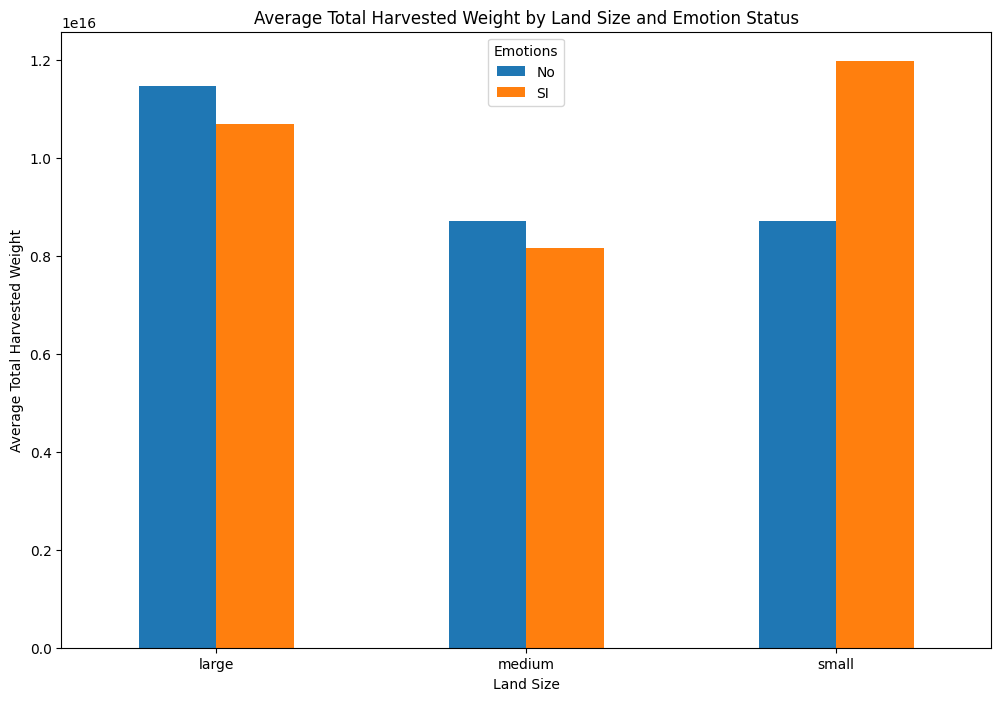

In [25]:
# Plotting the average totalHarvestedWeight by land size and emotion status

average_harvest_by_group_emotion.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Land Size')
plt.ylabel('Average Total Harvested Weight')
plt.title('Average Total Harvested Weight by Land Size and Emotion Status')
plt.xticks(rotation=0)
plt.legend(title='Emotions')
plt.show()

In [27]:
# ANOVA analysis for 'totalHarvestedWeight' across different 'landSize' and 'Emotions' groups

# Preparing the data for ANOVA
# Creating a new column that combines landSize and Emotions for ANOVA grouping
df['group'] = df['landSize'] + "_" + df['Emotions']

# Performing ANOVA
anova_model = ols('totalHarvestedWeight_clean ~ C(group)', data=df).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)

anova_result

,sum_sq,df,F,PR(>F)
C(group),1.792249e+33,5.0,1.721535,0.127242
Residual,1.549121e+35,744.0,NaN,NaN


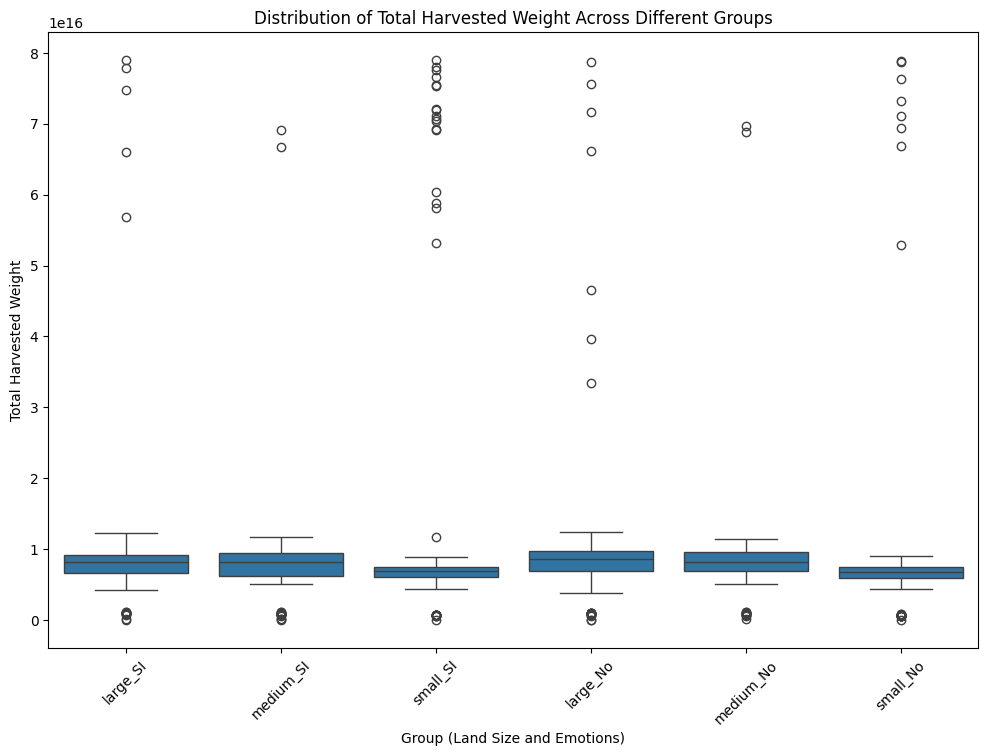

In [28]:
# Plotting the data to visualize the ANOVA findings
plt.figure(figsize=(12, 8))

# Boxplot to show distribution of totalHarvestedWeight_clean across different groups
sns.boxplot(x='group', y='totalHarvestedWeight_clean', data=df)

plt.xlabel('Group (Land Size and Emotions)')
plt.ylabel('Total Harvested Weight')
plt.title('Distribution of Total Harvested Weight Across Different Groups')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Redefining the ANOVA analysis for 'initialMoney' and 'money' based on 'Emotions'

# Performing ANOVA for 'initialMoney'
anova_initial_money = ols('initialMoney ~ C(Emotions)', data=df).fit()
anova_result_initial_money = sm.stats.anova_lm(anova_initial_money, typ=2)

# Performing ANOVA for 'money'
anova_money = ols('money ~ C(Emotions)', data=df).fit()
anova_result_money = sm.stats.anova_lm(anova_money, typ=2)

anova_result_initial_money, anova_result_money

(                   sum_sq     df        F    PR(>F)
 C(Emotions)  8.798546e+10    1.0  5.69249  0.017285
 Residual     1.156139e+13  748.0      NaN       NaN,
                    sum_sq     df         F    PR(>F)
 C(Emotions)  3.222942e+11    1.0  0.517056  0.472325
 Residual     4.662472e+14  748.0       NaN       NaN)

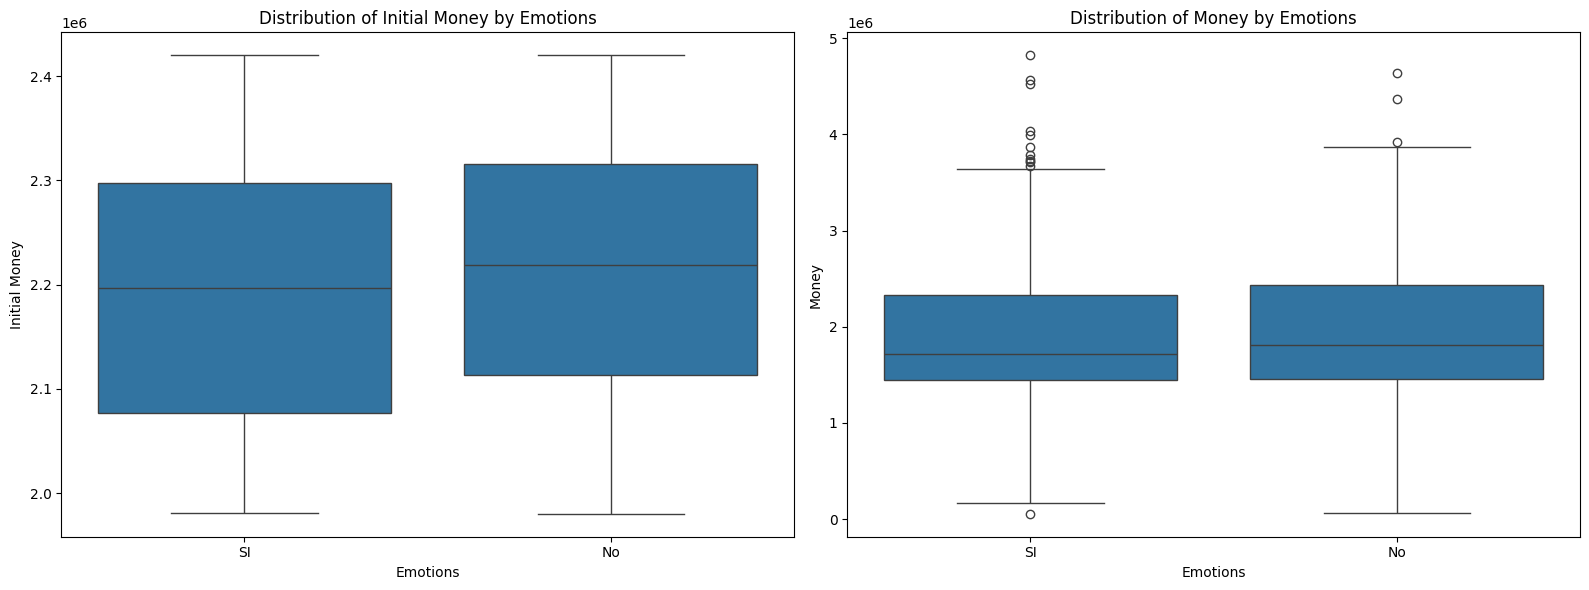

In [30]:
# Plotting the data to visualize the ANOVA findings for 'initialMoney' and 'money'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'initialMoney' by Emotions
sns.boxplot(ax=axes[0], x='Emotions', y='initialMoney', data=df)
axes[0].set_title('Distribution of Initial Money by Emotions')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Initial Money')

# Boxplot for 'money' by Emotions
sns.boxplot(ax=axes[1], x='Emotions', y='money', data=df)
axes[1].set_title('Distribution of Money by Emotions')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Money')

plt.tight_layout()
plt.show()